# Волкова Татьяна ПИ19-2 
## Вариант 3. Построение модели и оптимизация гиперпараметров. 
## Датасет: https://www.kaggle.com/zaurbegiev/my-dataset

In [68]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import time

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

## Основное задание:

#### 1.	Загрузить датасет в Python.

In [69]:
df = pd.read_csv("./data/Bank Loan Status Dataset.csv", index_col='Loan ID')

In [70]:
df.head(3)

,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan ID,,,,,,,,,,,,,,,,,
f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0


#### 2.	Описать набор данных и решаемую задачу.


Предметная область - банки, кредиты. 
Датасет содержит данные о клиентах и их кредитах: размер долга, вид кредита, срок работы, цель кредиты, доход  и т.д. 

Т.к. целевой переменной в датасете нет (о выдаче и невыдаче кредита), предсказывать я решила  кредитный рейтинг.

Тогда,
целевая переменная - Credit Score

Задача обучения - регрессия (регрессия (прогнозирование) – построение модели, способной предсказывать численную величину на основе набора признаков объекта).
Также может быть классификация, если добавить новый столбец ( area =0 - нет пожара, >0 - есть пожар)

In [71]:
# размер 
print("Количество наблюдений ->> ", df.shape[0], "\nКоличество признаков ->> ", df.shape[1]-1)

Количество наблюдений ->>  10353 
Количество признаков ->>  16


In [72]:
# типы переменных и НЕпустые значения
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10353 entries, f738779f-c726-40dc-92cf-689d73af533d to nan
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   10000 non-null  object 
 1   Current Loan Amount           10000 non-null  float64
 2   Term                          10000 non-null  object 
 3   Credit Score                  8019 non-null   float64
 4   Annual Income                 8019 non-null   float64
 5   Years in current job          9573 non-null   object 
 6   Home Ownership                10000 non-null  object 
 7   Purpose                       10000 non-null  object 
 8   Monthly Debt                  10000 non-null  float64
 9   Years of Credit History       10000 non-null  float64
 10  Months since last delinquent  4694 non-null   float64
 11  Number of Open Accounts       10000 non-null  float64
 12  Number of Credit Problems     10

In [73]:
# пустые значения
df.isna().sum()

Customer ID                      353
Current Loan Amount              353
Term                             353
Credit Score                    2334
Annual Income                   2334
Years in current job             780
Home Ownership                   353
Purpose                          353
Monthly Debt                     353
Years of Credit History          353
Months since last delinquent    5659
Number of Open Accounts          353
Number of Credit Problems        353
Current Credit Balance           353
Maximum Open Credit              353
Bankruptcies                     375
Tax Liens                        354
dtype: int64

In [74]:
# уникальные значения (количество и сами значения)
for col in df.columns:
    print(col, " -> ", df[col].dtype, " -> ", len(df[col].unique()), df[col].unique())

Customer ID  ->  object  ->  10001 ['ded0b3c3-6bf4-4091-8726-47039f2c1b90'
 '1630e6e3-34e3-461a-8fda-09297d3140c8'
 '2c60938b-ad2b-4702-804d-eeca43949c52' ...
 'f90cf410-a34b-49e7-8af9-2b405e17b827'
 'f1838fa9-7ad9-44d5-97a6-7a6d3f3529d7' nan]
Current Loan Amount  ->  float64  ->  6787 [611314. 266662. 153494. ... 132550. 223212.     nan]
Term  ->  object  ->  3 ['Short Term' 'Long Term' nan]
Credit Score  ->  float64  ->  273 [ 747.  734.  709.  727.  744.  741.  733.   nan  736.  683.  723.  680.
  696.  729.  742.  715.  722.  740.  708.  705.  738.  717.  706. 6470.
  712.  704.  646.  682.  713.  716.  649.  688.  702.  674.  746.  719.
  707.  726. 7440.  731.  751.  685.  721. 7110.  652.  748.  667.  743.
  690. 7150.  701.  730.  697.  699.  648.  673.  749.  657. 6640.  725.
  675.  720.  728.  724.  695.  643.  745.  714.  737.  606.  634.  735.
  710. 7350.  732. 7400.  663.  676.  698.  750.  668. 7030. 7070. 7450.
  694.  656.  703.  650.  718.  665.  693. 6620.  664. 728

#### 4.	Удалить ненужные данные, проанализировать отсутствующие значения.


<AxesSubplot:ylabel='Loan ID'>

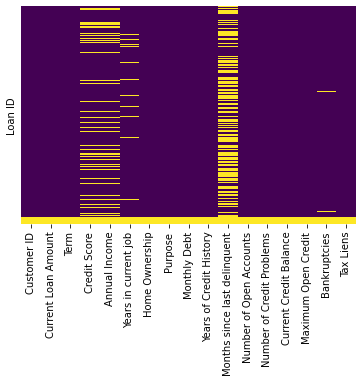

In [75]:
# анализ пустых мест
sns.heatmap(df.isna(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

In [76]:
# в конце мы видим полностью пустые строки: удалим их
# также удалим строки в которых пропусков мало
# тк credit score - целевая переменная, попытки заполнить пустые значения могут привести к плохим предсказаниям
# так что удалим пропуски и в ней, датасет достаточно большой и позволяет нам это сделать
df = df.dropna(subset=["Customer ID", "Bankruptcies", "Credit Score"])

# остальные пропуски заменим на среднее или случайные значения
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean())
df.loc[df['Years in current job'].isna(), 'Years in current job'] = np.random.choice(list(df['Years in current job'].unique()))

In [77]:
print(df.shape)
df.isna().sum()

(8000, 17)


Customer ID                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [78]:
# столбец Customer ID никак не может влиять на кредитный статус, удалим его
df = df.drop(['Customer ID'], axis=1)

In [79]:
# заменим похожие значения
df['Home Ownership'] = df['Home Ownership'].replace('HaveMortgage','Home Mortgage')
df['Purpose'] = df['Purpose'].replace(('other','small_business'),('Other','Business Loan'))

In [80]:
# преобразуем все признаки в числовые
df = pd.get_dummies(df, drop_first=True)

In [81]:
df.dtypes

Current Loan Amount               float64
Credit Score                      float64
Annual Income                     float64
Monthly Debt                      float64
Years of Credit History           float64
Months since last delinquent      float64
Number of Open Accounts           float64
Number of Credit Problems         float64
Current Credit Balance            float64
Maximum Open Credit               float64
Bankruptcies                      float64
Tax Liens                         float64
Term_Short Term                     uint8
Years in current job_10+ years      uint8
Years in current job_2 years        uint8
Years in current job_3 years        uint8
Years in current job_4 years        uint8
Years in current job_5 years        uint8
Years in current job_6 years        uint8
Years in current job_7 years        uint8
Years in current job_8 years        uint8
Years in current job_9 years        uint8
Years in current job_< 1 year       uint8
Home Ownership_Own Home           

In [82]:
df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_vacation,Purpose_wedding
Loan ID,,,,,,,,,,,,,,,,,,,,,
f738779f-c726-40dc-92cf-689d73af533d,611314.0,747.0,2074116.0,42000.83,21.8,35.108079,9.0,0.0,621908.0,1058970.0,...,0,0,0,0,0,0,0,0,0,0
6dcc0947-164d-476c-a1de-3ae7283dde0a,266662.0,734.0,1919190.0,36624.40,19.4,35.108079,11.0,0.0,679573.0,904442.0,...,0,0,0,0,0,0,0,0,0,0
f7744d01-894b-49c3-8777-fc6431a2cff1,153494.0,709.0,871112.0,8391.73,12.5,10.000000,10.0,0.0,38532.0,388036.0,...,0,0,0,0,0,0,0,0,0,0
83721ffb-b99a-4a0f-aea5-ef472a138b41,176242.0,727.0,780083.0,16771.87,16.5,27.000000,16.0,1.0,156940.0,531322.0,...,0,0,0,0,0,0,0,0,0,0
08f3789f-5714-4b10-929d-e1527ab5e5a3,321992.0,744.0,1761148.0,39478.77,26.0,44.000000,14.0,0.0,359765.0,468072.0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

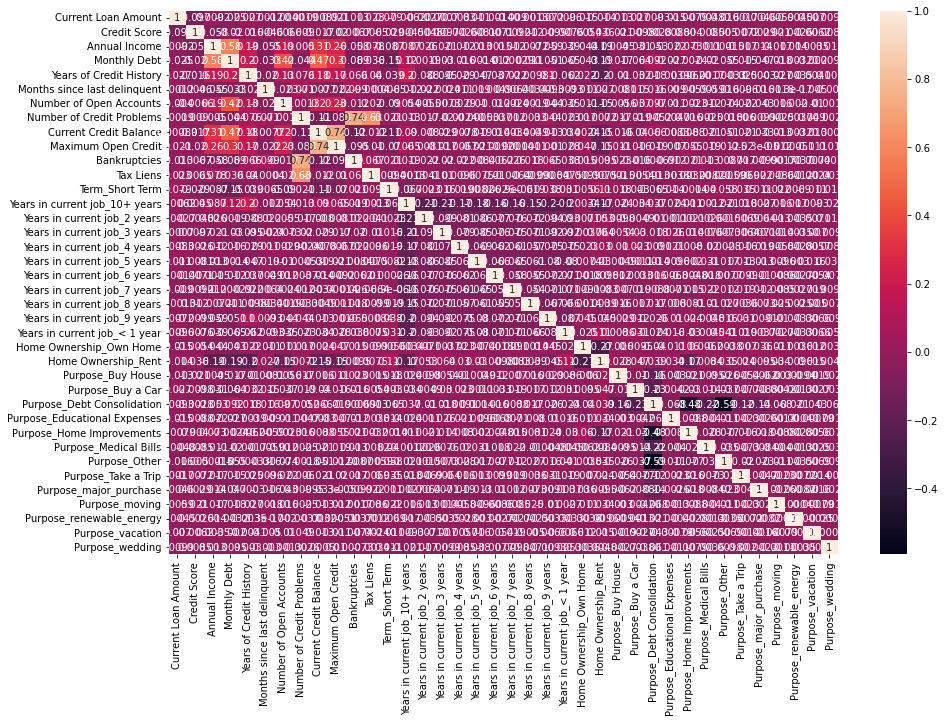

In [83]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr(), annot=True)

т.к .моя задача не состоит в очистке данных, детально останавливаться и анализировать каждый признак я не стала

#### 5.	Прокомментировать количественные параметры датасета.


In [84]:
# описательная статистика для числовых признаков
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_vacation,Purpose_wedding
count,8.000000e+03,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8.000000e+03,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.437994e+07,1078.842750,1.369940e+06,18465.014625,18.183087,35.108079,11.084125,0.165500,2.908113e+05,6.573983e+05,...,0.001250,0.058625,0.012750,0.087625,0.004125,0.005375,0.001250,0.000125,0.000500,0.001000
std,3.470923e+07,1479.117119,8.692091e+05,12189.305328,6.959080,14.772282,5.009185,0.497886,3.813781e+05,9.972751e+05,...,0.035335,0.234936,0.112201,0.282766,0.064098,0.073122,0.035335,0.011180,0.022356,0.031609
min,2.147200e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.832380e+05,706.000000,8.495138e+05,10245.797500,13.500000,35.000000,8.000000,0.000000,1.097772e+05,2.698960e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.231580e+05,725.000000,1.168386e+06,16149.050000,17.000000,35.108079,10.000000,0.000000,2.090285e+05,4.614940e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.448465e+05,741.000000,1.665174e+06,23996.952500,21.600000,35.108079,14.000000,0.000000,3.661632e+05,7.842670e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000e+08,7510.000000,1.781535e+07,143526.570000,57.500000,131.000000,55.000000,10.000000,1.623744e+07,3.752742e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.	Выделить целевую переменную и факторные переменные. 6.	Разбить выборку на обучающую и тестовую.


In [85]:
# целевая переменная и факторы
Y = df['Credit Score']
X = df.drop(['Credit Score'], axis=1)

# обучающая и тестовая выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

#### 7.	Работа по вариантам.

## Вариант 3. Построение модели и оптимизация гиперпараметров. 

Данный вариант предполагает фокусировку на процессе улучшения эффективности модели обучения с учителем. Студенту следует подготовить датасет к обучению, обучить одну из моделей с учителем со значениями гиперпараметров по умолчанию, получить значение эффективности. После этого вручную или автоматически подобрать значения гиперпараметров таким образом, чтобы получить максимальный прирост эффективности.

In [86]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1),data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)
    
def print_learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.1, 1, 30)):
    _, train_scores, test_scores = learning_curve(model, x_train, y_train, train_sizes=train_sizes, cv=3)
    plt.title(model)
    plt.xlabel('train size')
    plt.ylabel('score')
    plot_with_err(train_sizes, train_scores, label='Training scores')
    plot_with_err(train_sizes, test_scores, label='Validation scores', color='g')
    plt.legend()
    plt.show()
    
def analyze_model(model, x_train=X_train, x_test=X_test, y_train=y_train, y_test=y_test):
    
    start = time.time()
    model.fit(x_train, y_train)
    end = time.time()
    print('Время обучения ->> ', round(end - start, 2))
    
    y_pred = model.predict(x_test)
    
    print('RMSE (среднеквадратичная ошибка) -> ', mean_squared_error(y_test, y_pred))
    print('MAE (средняя абсолютная ошибка) -> ', mean_absolute_error(y_test, y_pred))
    print('R-squared -> ', r2_score(y_test, y_pred))
    
#     очень долго строится
#     plt.rcParams['figure.figsize'] = (15, 10)
#     print(print_learning_curve(model, x_train, y_train))

##### Модель до подбора гиперпараметров

In [87]:
forest = RandomForestRegressor()
analyze_model(forest)

Время обучения ->>  9.29
RMSE (среднеквадратичная ошибка) ->  2540760.519344375
MAE (средняя абсолютная ошибка) ->  770.59345
R-squared ->  -0.08726310648222824


##### Подбор гиперпараметров

In [88]:
parametrs = { 'n_estimators': [10, 50, 100],
              'max_depth': [2, 5],
              'min_samples_leaf': [2, 5],
              'min_samples_split': [2, 5] }

grid = GridSearchCV(forest, parametrs, n_jobs=-1, cv=5, scoring='r2')
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

##### Модель после подбора гиперпараметров

In [89]:
forest = RandomForestRegressor(**grid.best_params_)
analyze_model(forest)

Время обучения ->>  1.14
RMSE (среднеквадратичная ошибка) ->  2311683.6865613516
MAE (средняя абсолютная ошибка) ->  696.0795095974489
R-squared ->  0.01076533300999516


##### Вывод
Ошибки и время обучения уменьшились, r2 увеличился ->> модель улучшилась (но она все еще достаточно плоха, т.к R2 далек от 1)